# Single Threaded

/tmp/ipykernel_3554657/2839962924.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size=25)


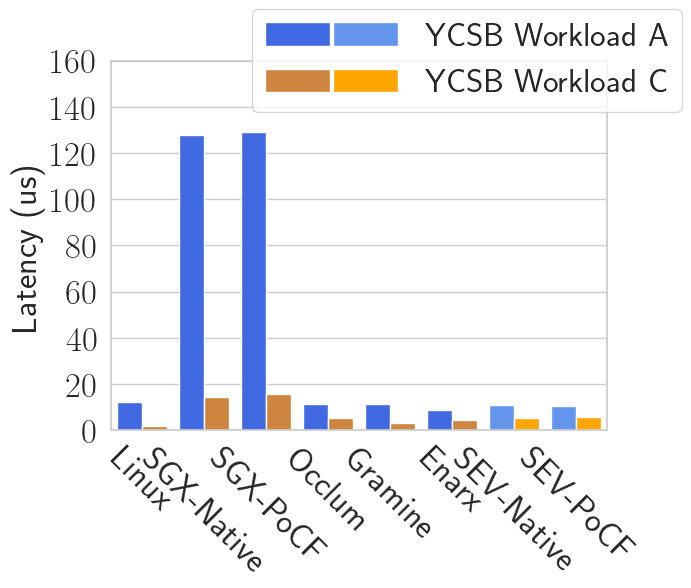

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.legend_handler import HandlerTuple

plt.rcParams['mathtext.default'] = 'sf'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rc('legend', fontsize=14)

sns.set(style='whitegrid')

# colors = ['royalblue', 'royalblue', 'royalblue', 'cornflowerblue', 'cornflowerblue','royalblue', 'royalblue', 'royalblue']
xs =  ['Linux', 'SGX-Native', 'SGX-PoCF',  'Occlum', 'Gramine', 'Enarx', 'SEV-Native', 'SEV-PoCF']
xs = [xs[i//2] for i in range(len(xs)*2)]

hue = ['\sf YCSB Workload A', '\sf YCSB Workload C'] * 8

workloada = [15.09, 159.69, 161.49,  14.24, 13.94, 11.2,13.67, 13.32,]
workloadc = [2.48, 18.15, 19.41,  6.71, 3.81, 5.72,6.57, 7.32]

ys = []
for i in range(len(workloada)):
    ys.append(workloada[i])
    ys.append(workloadc[i])

palette = ['royalblue', 'peru'] * 6
palette.extend(['cornflowerblue', 'orange'] * 2)

g = sns.barplot(x=xs, y=ys, hue=hue, palette=palette)

for bars, colors in zip(g.containers, (palette[0::2], palette[1::2])):
     for bar, color in zip(bars, colors):
          bar.set_facecolor(color)

g.set_ylabel('Latency (us)', fontsize=25)
g.set_xticklabels(g.get_xticklabels(), size=25, rotation=-45)
g.set_yticklabels(g.get_yticklabels(), size=25)
g.set_ylim(0,200)
handles = [tuple([bar_group[0], bar_group[7]]) for bar_group in g.containers]

g.legend(handles=handles,
        fontsize=24,
        labels=[bar_group.get_label() for bar_group in g.containers],
        title=g.legend_.get_title().get_text(),
        handlelength=4, handler_map={tuple: HandlerTuple(ndivide=None, pad=0.1)},
        bbox_to_anchor=(0.25, 1), loc='center left')

plt.savefig('./macrobenchmarks_st_latency_db.pdf', bbox_inches='tight')

import tikzplotlib

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)
tikzplotlib_fix_ncols(plt.gcf())

tikzplotlib.save("macrobenchmarks_st_latency_db.tex")

/tmp/ipykernel_3298268/609088795.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size=24)


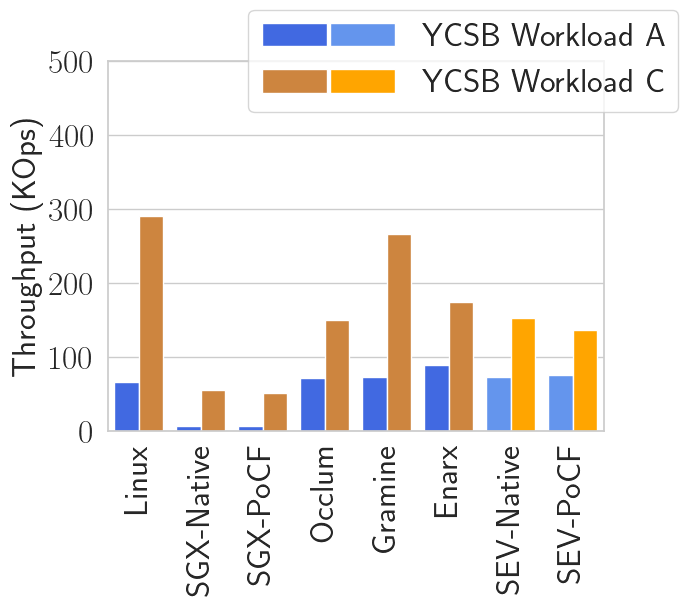

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.legend_handler import HandlerTuple

plt.rcParams['mathtext.default'] = 'sf'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rc('legend', fontsize=14)

sns.set(style='whitegrid')

# colors = ['royalblue', 'royalblue', 'royalblue', 'cornflowerblue', 'cornflowerblue','royalblue', 'royalblue', 'royalblue']
xs =  ['Linux', 'SGX-Native', 'SGX-PoCF',  'Occlum', 'Gramine', 'Enarx','SEV-Native', 'SEV-PoCF',]
xs = [xs[i//2] for i in range(len(xs)*2)]

hue = ['\sf YCSB Workload A', '\sf YCSB Workload C'] * 8

workloada = np.array([66329.42808226023, 6262.279145098633,6192.8744022480705,70979.35834313979,72833.45544712094,89285.7142857143, 73105.74772287549,75031.26166262483,])/1000
workloadc = np.array([290737.45005440875,55078.07691382677,51509.81235915333, 149953.97238897407,266082.76836067165, 174605.3918144992,152204.40269560207,136537.75278148975 ])/1000

ys = []
for i in range(len(workloada)):
    ys.append(workloada[i])
    ys.append(workloadc[i])

palette = ['royalblue', 'peru'] * 6
palette.extend(['cornflowerblue', 'orange'] * 2)

g = sns.barplot(x=xs, y=ys, hue=hue, palette=palette)

for bars, colors in zip(g.containers, (palette[0::2], palette[1::2])):
     for bar, color in zip(bars, colors):
          bar.set_facecolor(color)

g.set_ylabel('Throughput (KOps)', fontsize=24)
g.set_ylim(0, 500)
# g.set_yscale('log')
g.set_xticklabels(g.get_xticklabels(), size=24, rotation=90)
g.set_yticklabels(g.get_yticklabels(), size=24)
handles = [tuple([bar_group[0], bar_group[7]]) for bar_group in g.containers]

g.legend(handles=handles,
        fontsize=24,
        labels=[bar_group.get_label() for bar_group in g.containers],
        title=g.legend_.get_title().get_text(),
        handlelength=4, handler_map={tuple: HandlerTuple(ndivide=None, pad=0.1)},
        bbox_to_anchor=(0.25, 1), loc='center left')

plt.savefig('./macrobenchmarks_st_throughput_db.pdf', bbox_inches='tight')

# Multi-thread

/tmp/ipykernel_852810/1927468346.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size=24)


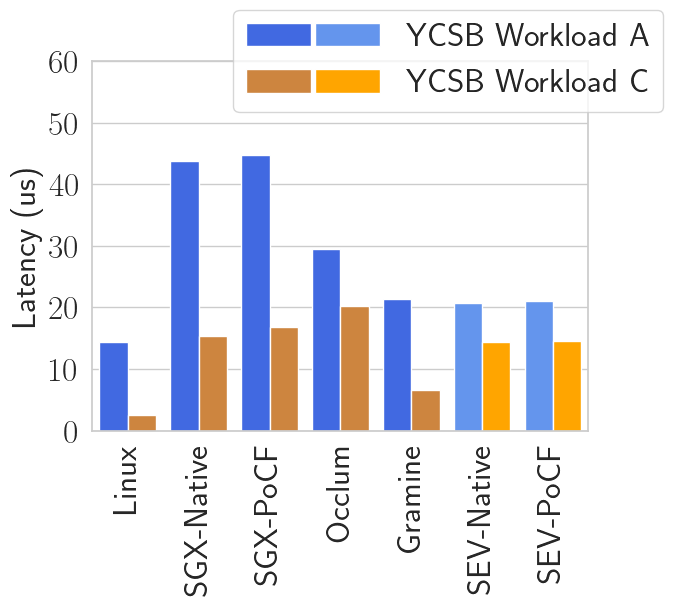

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.legend_handler import HandlerTuple

plt.rcParams['mathtext.default'] = 'sf'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rc('legend', fontsize=14)

sns.set(style='whitegrid')

# colors = ['royalblue', 'royalblue', 'royalblue', 'cornflowerblue', 'cornflowerblue','royalblue', 'royalblue', 'royalblue']
xs =  ['Linux', 'SGX-Native', 'SGX-PoCF',  'Occlum', 'Gramine', 'SEV-Native', 'SEV-PoCF',]
xs = [xs[i//2] for i in range(len(xs)*2)]

hue = ['\sf YCSB Workload A', '\sf YCSB Workload C'] * 7

workloada = [14.43, 43.74, 44.69, 29.53,21.32 ,20.71, 20.97]
workloadc = [2.48, 15.42, 16.79, 20.18, 6.66,14.32, 14.57,]

ys = []
for i in range(len(workloada)):
    ys.append(workloada[i])
    ys.append(workloadc[i])

palette = ['royalblue', 'peru'] * 5
palette.extend(['cornflowerblue', 'orange'] * 2)

g = sns.barplot(x=xs, y=ys, hue=hue, palette=palette)

for bars, colors in zip(g.containers, (palette[0::2], palette[1::2])):
     for bar, color in zip(bars, colors):
          bar.set_facecolor(color)

g.set_ylabel('Latency (us)', fontsize=24)
g.set_ylim(0,60)
g.set_xticklabels(g.get_xticklabels(), size=24, rotation=90)
g.set_yticklabels(g.get_yticklabels(), size=24)
handles = [tuple([bar_group[0], bar_group[6]]) for bar_group in g.containers]
g.legend(handles=handles,
        fontsize=24,
        labels=[bar_group.get_label() for bar_group in g.containers],
        title=g.legend_.get_title().get_text(),
        handlelength=4, handler_map={tuple: HandlerTuple(ndivide=None, pad=0.1)},
        bbox_to_anchor=(0.25, 1), loc='center left')

plt.savefig('./macrobenchmarks_mt_latency_db.pdf', bbox_inches='tight')

/tmp/ipykernel_3298268/3475024530.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size=24)


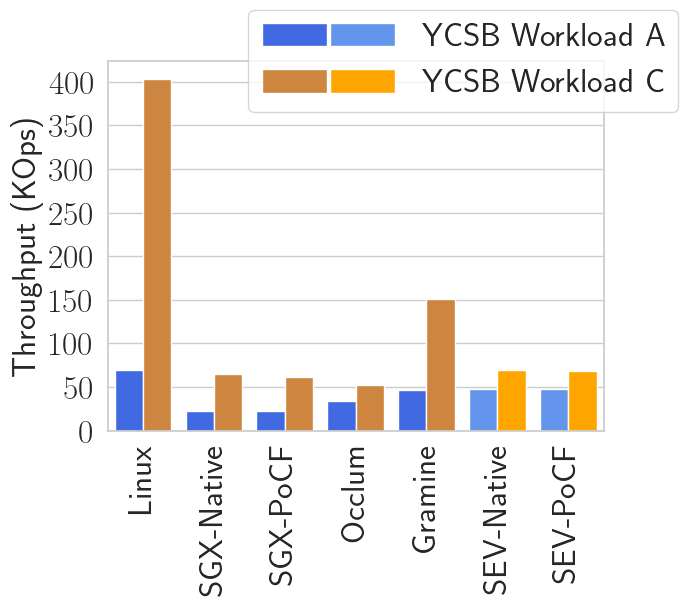

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.legend_handler import HandlerTuple

plt.rcParams['mathtext.default'] = 'sf'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rc('legend', fontsize=14)

sns.set(style='whitegrid')

# colors = ['royalblue', 'royalblue', 'royalblue', 'cornflowerblue', 'cornflowerblue','royalblue', 'royalblue', 'royalblue']
xs =  ['Linux', 'SGX-Native', 'SGX-PoCF', 'Occlum', 'Gramine', 'SEV-Native', 'SEV-PoCF',]
xs = [xs[i//2] for i in range(len(xs)*2)]

hue = ['\sf YCSB Workload A', '\sf YCSB Workload C'] * 7

workloada = np.array([69714.60148925442, 22982.382695488726, 22536.30702118537,   34144.330789403175, 46942.667066581984, 48266.83963185182, 47684.03073493274,]) / 1000
workloadc = np.array([403528.7658008487, 64924.46354189953, 61860.2803286348,  52797.38627562077, 150610.19880449894,69798.4317960558, 68610.12705111492,]) / 1000

ys = []
for i in range(len(workloada)):
    ys.append(workloada[i])
    ys.append(workloadc[i])

palette = ['royalblue', 'peru'] * 5
palette.extend(['cornflowerblue', 'orange'] * 2)

g = sns.barplot(x=xs, y=ys, hue=hue, palette=palette)

for bars, colors in zip(g.containers, (palette[0::2], palette[1::2])):
     for bar, color in zip(bars, colors):
          bar.set_facecolor(color)

g.set_ylabel('Throughput (KOps)', fontsize=24)
# g.set_ylim(10**-2, 10**4)
# g.set_yscale('log')
g.set_xticklabels(g.get_xticklabels(), size=24, rotation=90)
g.set_yticklabels(g.get_yticklabels(), size=24)
handles = [tuple([bar_group[0], bar_group[6]]) for bar_group in g.containers]

g.legend(handles=handles,
        fontsize=24,
        labels=[bar_group.get_label() for bar_group in g.containers],
        title=g.legend_.get_title().get_text(),
        handlelength=4, handler_map={tuple: HandlerTuple(ndivide=None, pad=0.1)},
        bbox_to_anchor=(0.25, 1), loc='center left')

plt.savefig('./macrobenchmarks_mt_throughput_db.pdf', bbox_inches='tight')